In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
data = pd.read_csv("intelligent_classroom_categorical_dataset.csv")

In [3]:
data

,student_id,age,engagement_level,task_type,task_difficulty,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,skill_gap,personalized_feedback,optimized_learning_path,learning_progress,progress_category
0,1,16,8.28,Speaking,Hard,224,54,0.77,3,Vocabulary,Improve pronunciation.,Listening → Speaking → Writing,23.41,Low
1,1,13,7.65,Speaking,Easy,472,76,-0.54,0,Pronunciation,Practice grammar rules.,Writing → Reading → Listening,31.58,Low
2,1,14,5.74,Writing,Easy,332,53,0.41,6,Grammar,Improve pronunciation.,Writing → Reading → Listening,24.91,Low
3,1,16,9.56,Grammar,Medium,77,96,-0.21,9,Grammar,Practice grammar rules.,Writing → Reading → Listening,41.41,Medium
4,1,12,2.00,Reading,Medium,150,62,-0.76,1,Grammar,Improve pronunciation.,Listening → Speaking → Writing,25.39,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,500,14,0.78,Writing,Easy,473,95,-0.73,5,Vocabulary,Good progress.,Reading → Grammar → Speaking,36.16,Low
4996,500,15,0.73,Reading,Medium,312,93,0.05,6,Grammar,Practice grammar rules.,Writing → Reading → Listening,40.83,Medium
4997,500,12,8.50,Writing,Easy,31,67,0.36,0,Vocabulary,Focus on synonyms.,Reading → Grammar → Speaking,31.96,Low
4998,500,11,2.13,Writing,Easy,103,61,-0.09,5,Pronunciation,Focus on synonyms.,Listening → Speaking → Writing,21.79,Low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               5000 non-null   int64  
 1   age                      5000 non-null   int64  
 2   engagement_level         5000 non-null   float64
 3   task_type                5000 non-null   object 
 4   task_difficulty          5000 non-null   object 
 5   time_spent_on_task       5000 non-null   int64  
 6   accuracy_of_responses    5000 non-null   int64  
 7   emotion_score            5000 non-null   float64
 8   frustration_level        5000 non-null   int64  
 9   skill_gap                3734 non-null   object 
 10  personalized_feedback    5000 non-null   object 
 11  optimized_learning_path  5000 non-null   object 
 12  learning_progress        5000 non-null   float64
 13  progress_category        5000 non-null   object 
dtypes: float64(3), int64(5),

In [5]:
data.describe()

,student_id,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,learning_progress
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,250.500000,13.468400,4.942076,314.99840,74.648600,0.009420,5.112800,31.857064
std,144.351715,2.276673,2.880519,165.75942,14.552233,0.579803,3.141409,7.688118
min,1.000000,10.000000,0.000000,30.00000,50.000000,-1.000000,0.000000,8.430000
25%,125.750000,11.000000,2.457500,171.00000,62.000000,-0.490000,2.000000,26.140000
50%,250.500000,13.000000,4.880000,315.00000,74.000000,0.020000,5.000000,31.805000
75%,375.250000,15.000000,7.420000,459.00000,87.000000,0.510000,8.000000,37.410000
max,500.000000,17.000000,10.000000,599.00000,100.000000,1.000000,10.000000,54.830000


Text(0.5, 1.0, 'Outliers in engagement_level')

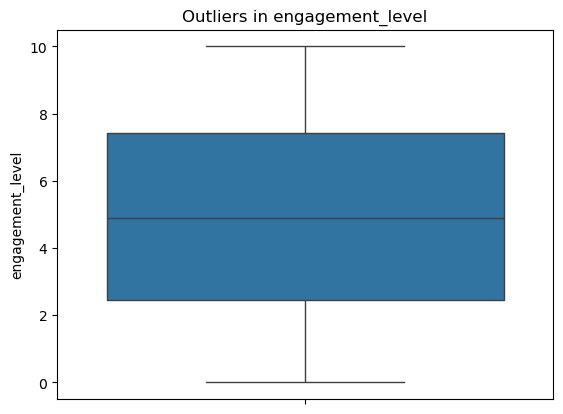

In [6]:
sns.boxplot(y=data["engagement_level"])
plt.title("Outliers in engagement_level")

In [7]:
data.isnull().sum()

student_id                    0
age                           0
engagement_level              0
task_type                     0
task_difficulty               0
time_spent_on_task            0
accuracy_of_responses         0
emotion_score                 0
frustration_level             0
skill_gap                  1266
personalized_feedback         0
optimized_learning_path       0
learning_progress             0
progress_category             0
dtype: int64

In [9]:
data["progress_category"].value_counts()

progress_category
Low       4226
Medium     774
Name: count, dtype: int64

In [10]:
data["progress_category"].replace("Medium", "High", inplace=True)
data["progress_category"].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_6096\589724437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["progress_category"].replace("Medium", "High", inplace=True)


progress_category
Low     4226
High     774
Name: count, dtype: int64

In [11]:
median = data['learning_progress'].median()
data.loc[(data["progress_category"] == "Low") & (data['learning_progress'] >= median), "progress_category"] = "Medium"
data["progress_category"].value_counts()

progress_category
Low       2500
Medium    1726
High       774
Name: count, dtype: int64

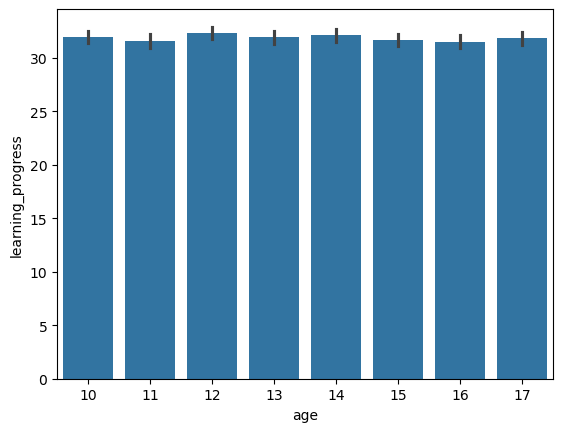

In [16]:
sns.barplot(x="age", y="learning_progress", data=data)
plt.show()

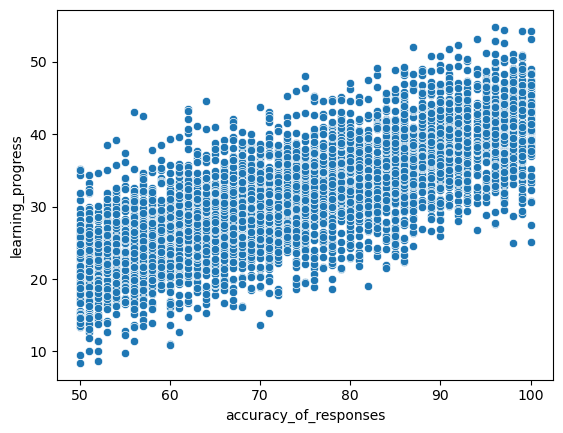

In [17]:
sns.scatterplot(data=data, x="accuracy_of_responses", y="learning_progress")
plt.show()

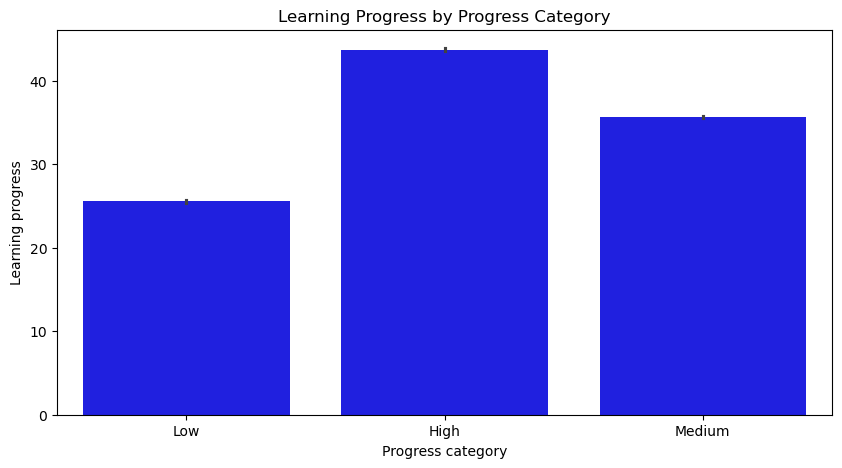

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x="progress_category", y="learning_progress", data=data, color="blue")
plt.xlabel("Progress category")
plt.ylabel("Learning progress")
plt.title("Learning Progress by Progress Category")
plt.show()

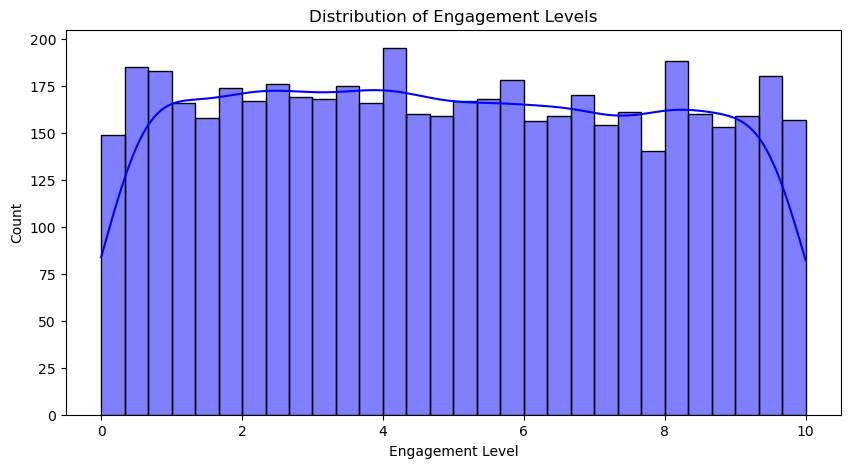

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data["engagement_level"], bins=30, kde=True, color="blue")
plt.xlabel("Engagement Level")
plt.ylabel("Count")
plt.title("Distribution of Engagement Levels")
plt.show()

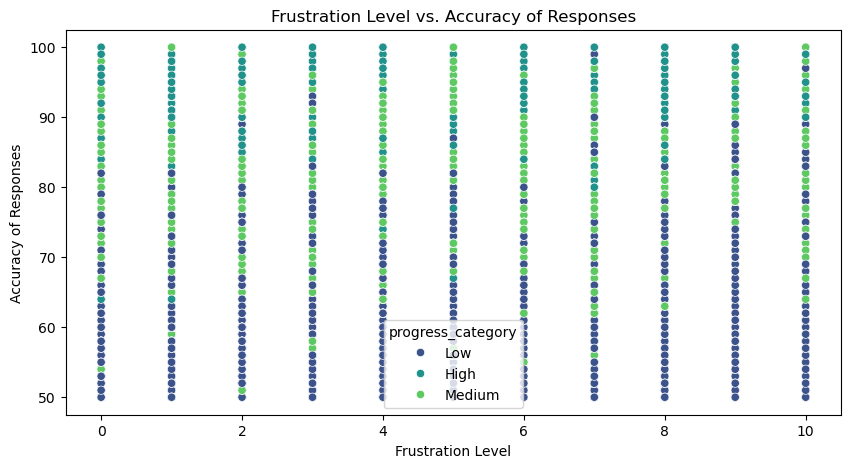

In [20]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="frustration_level", y="accuracy_of_responses", data=data, hue="progress_category", palette="viridis")
plt.xlabel("Frustration Level")
plt.ylabel("Accuracy of Responses")
plt.title("Frustration Level vs. Accuracy of Responses")
plt.show()

In [21]:
def task(value):
    if value == 'Easy':
        return 0
    elif value =='Medium':
        return 1
    elif value == 'Hard':
        return 2
    else: 
        return none
data['task_difficulty_labeled'] = data['task_difficulty'].apply(task)


In [22]:
data.skill_gap = data.skill_gap.fillna("No Gap")

In [23]:
data.skill_gap.value_counts()

skill_gap
Grammar          1297
No Gap           1266
Vocabulary       1225
Pronunciation    1212
Name: count, dtype: int64

In [24]:
def skill_gap_label(skill: str)-> int:
    if skill == "No Gap":
        return 0
    elif skill == "Grammar":
        return 1
    elif skill == "Vocabulary":
        return 2
    elif skill == "Pronunciation":
        return 3

data["skill_gap_label"] = data.skill_gap.apply(skill_gap_label)

In [25]:
data.progress_category.value_counts()

progress_category
Low       2500
Medium    1726
High       774
Name: count, dtype: int64

In [26]:
def progress_category_label(progress: str)-> int:
    if progress == "Low":
        return 0
    elif progress == "Medium":
        return 1
    elif progress == "High":
        return 2
        
data["progress_category_label"] = data.progress_category.apply(progress_category_label)

In [27]:
def task_type_label(task: str)-> int:
    if task == "Grammar":
        return 0
    elif task == "Speaking":
        return 1
    elif task == "Writing":
        return 2
    elif task == "Reading":
        return 3
    elif task == "Listening":
        return 4

data["task_type_label"] = data.task_type.apply(task_type_label)

In [28]:
data_num = data[["age", "engagement_level", "time_spent_on_task", "accuracy_of_responses", "emotion_score", "frustration_level", "task_difficulty_labeled", "skill_gap_label", "progress_category_label", "task_type_label", "learning_progress"]]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'age'),
  Text(1, 0, 'engagement_level'),
  Text(2, 0, 'accuracy_of_responses'),
  Text(3, 0, 'emotion_score'),
  Text(4, 0, 'frustration_level'),
  Text(5, 0, 'task_difficulty_labeled'),
  Text(6, 0, 'skill_gap_label'),
  Text(7, 0, 'progress_category_label'),
  Text(8, 0, 'task_type_label'),
  Text(9, 0, 'learning_progress')])

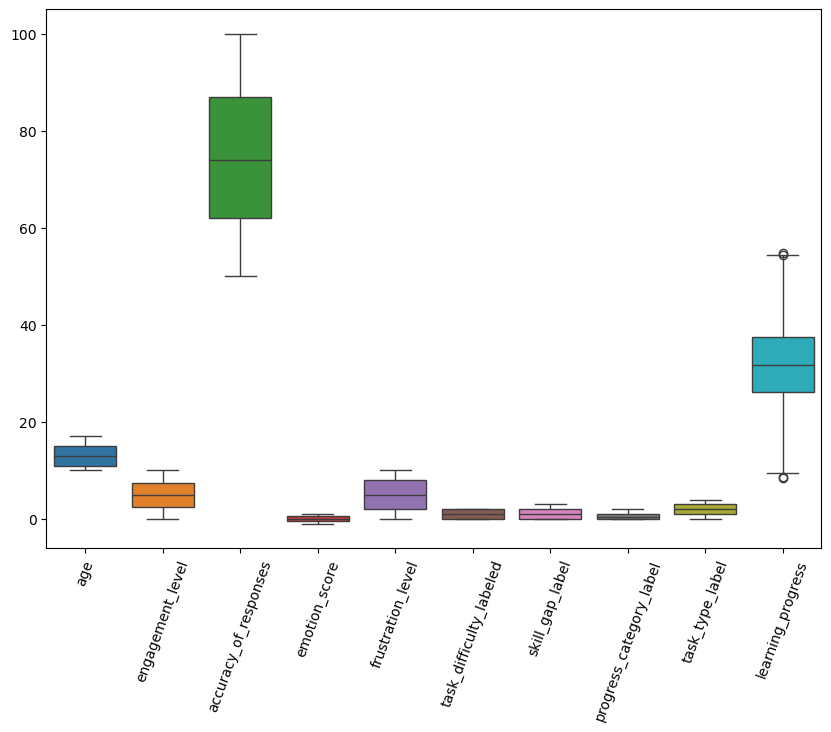

In [29]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=data_num.drop(columns=["time_spent_on_task"]))
plt.xticks(rotation=70)

In [30]:
Q1 = data_num["learning_progress"].quantile(.25)
Q3 = data_num["learning_progress"].quantile(.75)
IQR = Q3 - Q1
lower_lim = Q1 - IQR * 1.5
upper_lim = Q3 + IQR * 1.5
print(lower_lim, upper_lim)

9.235000000000007 54.31499999999999


In [31]:
data_num = data_num[(data_num.learning_progress >= lower_lim) & (data_num.learning_progress <= upper_lim)]

In [32]:
data_corr = data_num.corr()

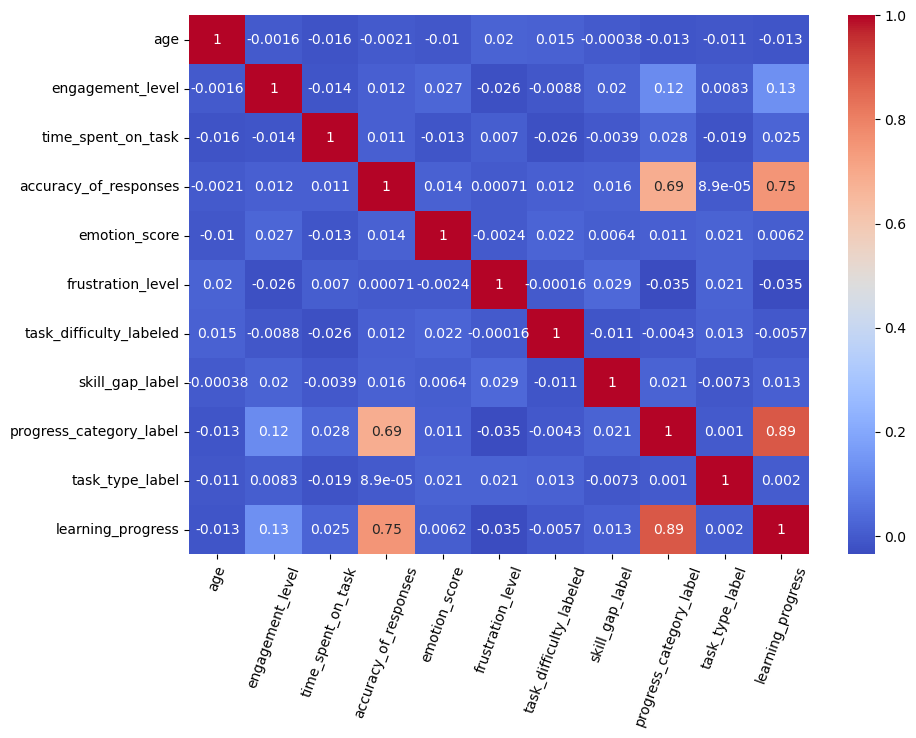

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=70)
plt.show()

### Test 1 - model "simplu" liniar
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [34]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=62)

In [36]:
model1 = LinearRegression()

In [37]:
model1.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred1 = model1.predict(X_test)

In [39]:
MAE = mean_absolute_error(y_test, y_pred1)
MSE = mean_squared_error(y_test, y_pred1)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.546353818668714
MSE: 10.441439649249226
RMSE: 3.2313216567295227


### Test 2 - model "simplu" liniar PolynomialFeatures
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [40]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [41]:
test_err = []
a = int(input("Select lower range: "))
b = int(input("Select upper range: "))
for i in range(a, b):
    poly_conv = PolynomialFeatures(degree=i, include_bias=False)
    X_conv = poly_conv.fit_transform(X)

    X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
    model = LinearRegression()

    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)

    test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))

Select lower range: 1
Select upper range: 5


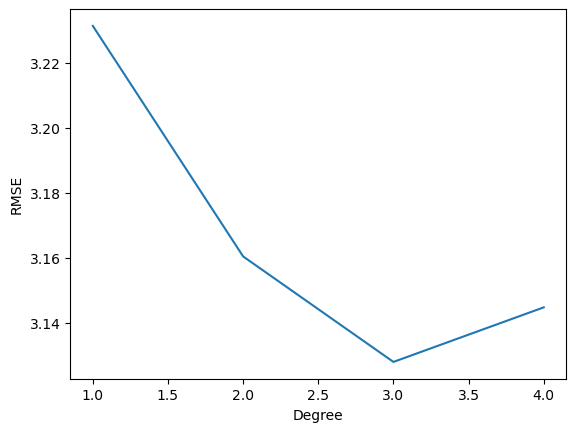

In [42]:
plt.plot(range(a, b), test_err)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.show()

In [43]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
model2 = LinearRegression()

model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [44]:
MAE = mean_absolute_error(y_test, y_pred2)
MSE = mean_squared_error(y_test, y_pred2)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.47059982982993
MSE: 9.783824561271544
RMSE: 3.1279105743725384


### Test 3 - model "simplu" liniar scalat Polynomial Features
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [45]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [46]:
# test_err = []
# a = int(input("Select lower range: "))
# b = int(input("Select upper range: "))
# for i in range(a, b):
#     poly_conv = PolynomialFeatures(degree=i, include_bias=False)
#     X_conv = poly_conv.fit_transform(X)

#     X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     model = LinearRegression()

#     model.fit(X_train_scaled, y_train)

#     test_pred = model.predict(X_test_scaled)

#     test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))
    

In [47]:
# plt.plot(range(a, b), test_err)
# plt.xlabel("Degree")
# plt.ylabel("RMSE")
# plt.show()

In [49]:
poly_conv = PolynomialFeatures(degree=3, include_bias = False)
X_conv = poly_conv.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

In [51]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)

In [53]:
X_test_scaled = scaler.transform(X_test)

In [54]:
model3 = LinearRegression()

In [55]:
model3.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
y_pred3 = model3.predict(X_test_scaled)

In [57]:
MAE = mean_absolute_error(y_test, y_pred3)
MSE = mean_squared_error(y_test, y_pred3)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.470599829820961
MSE: 9.783824561411492
RMSE: 3.1279105743949094


### Test 4 - model "simplu" liniar Polynomial Features
#### age, engagement_level, accuracy_of_responses, progress_category_label, skill_gap_label Linear Regression

In [58]:
X = data_num[["age", "engagement_level", "accuracy_of_responses", "progress_category_label", "skill_gap_label"]]
y = data_num["learning_progress"]

In [59]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
model4 = LinearRegression()

model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

In [60]:
MAE = mean_absolute_error(y_test, y_pred4)
MSE = mean_squared_error(y_test, y_pred4)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.472198284204377
MSE: 9.852818145158414
RMSE: 3.1389199010421427


In [61]:
# test_err = []
# a = int(input("Select lower range: "))
# b = int(input("Select upper range: "))
# for i in range(a, b):
#     poly_conv = PolynomialFeatures(degree=i, include_bias=False)
#     X_conv = poly_conv.fit_transform(X)

#     X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
#     model = LinearRegression()

#     model.fit(X_train, y_train)

#     test_pred = model.predict(X_test)

#     test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))
    

In [62]:
# plt.plot(range(a, b), test_err)
# plt.xlabel("Degree")
# plt.ylabel("RMSE")
# plt.show()

In [63]:
data_num

,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,task_difficulty_labeled,skill_gap_label,progress_category_label,task_type_label,learning_progress
0,16,8.28,224,54,0.77,3,2,2,0,1,23.41
1,13,7.65,472,76,-0.54,0,0,3,0,1,31.58
2,14,5.74,332,53,0.41,6,0,1,0,2,24.91
3,16,9.56,77,96,-0.21,9,1,1,2,0,41.41
4,12,2.00,150,62,-0.76,1,1,1,0,3,25.39
...,...,...,...,...,...,...,...,...,...,...,...
4995,14,0.78,473,95,-0.73,5,0,2,1,2,36.16
4996,15,0.73,312,93,0.05,6,1,1,2,3,40.83
4997,12,8.50,31,67,0.36,0,0,2,1,2,31.96
4998,11,2.13,103,61,-0.09,5,0,3,0,2,21.79


### Test 5 - model "simplu" liniar Polynomial Features scaled
#### toate coloanele Linear Regression

In [64]:
X = data_num.drop(columns=["learning_progress"])
y = data_num["learning_progress"]

In [66]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model5 = LinearRegression()

model5.fit(X_train_scaled, y_train)

y_pred5 = model5.predict(X_test_scaled)

In [67]:
MAE = mean_absolute_error(y_test, y_pred5)
MSE = mean_squared_error(y_test, y_pred5)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.557204891079722
MSE: 10.565771911271712
RMSE: 3.2505033319890186


### Test 6 - model ANN
#### toate coloanele 

In [69]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=62)

In [71]:
X_train_ann.shape[1]

10

In [72]:
model_ann1 = Sequential([
    Dense(16, activation = 'relu', input_dim = X_train_ann.shape[1]), # input_shape = X_train_ann.shape[1]
    Dense(16, activation = 'relu', input_dim = X_train_ann.shape[1]),
    Dense(1)
])

model_ann1.compile(optimizer=Adam(0.02), loss='mean_squared_error')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
history = model_ann1.fit(X_train_ann, y_train_ann, epochs=15, batch_size=16)

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - loss: 264.3272
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5911  
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 20.7197
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 15.8972
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 20.3039
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.7343
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.9764  
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 16.0813
Epoch 9/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 13.2659
Epoch 10/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 12.9721
Epoch 11/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 13.0614
Epoch 12/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 13.2280
Epoch 13/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 12.5074
Epoch 14/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.4283
Epoch 15/15
219/2

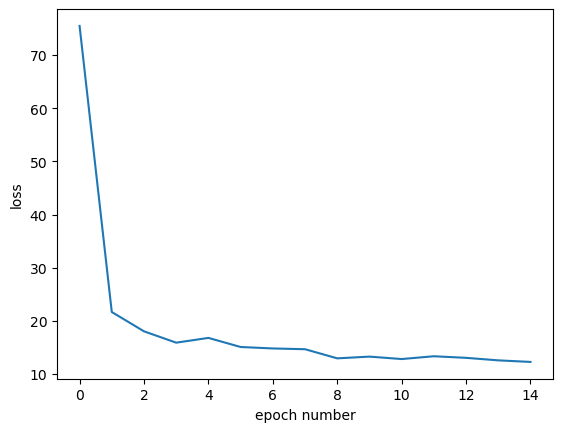

In [74]:
plt.plot(history.history['loss'])
plt.xlabel('epoch number')
plt.ylabel("loss")
# plt.xlim(40,500)
# plt.ylim(0,3)
plt.show()

In [75]:
y_pred_ann_1 = model_ann1.predict(X_test_ann)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [76]:
MAE = mean_absolute_error(y_test, y_pred_ann_1)
MSE = mean_squared_error(y_test, y_pred_ann_1)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.6995614484057895
MSE: 11.660643600419064
RMSE: 3.4147684548764157


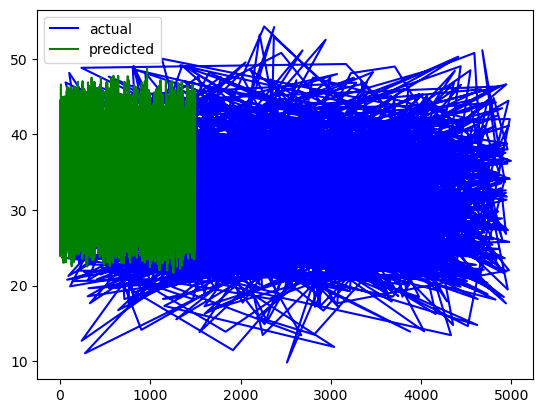

In [77]:
plt.plot(y_test_ann, label='actual', color='b')
plt.plot(y_pred_ann_1, label='predicted', color='g')
plt.legend()
plt.show()

### Test 7 - model ANN date scalate
#### toate coloanele 

In [78]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=62)

In [79]:
scaler = StandardScaler()

In [80]:
X_train_ann_scaled = scaler.fit_transform(X_train_ann)
X_test_ann_scaled = scaler.transform(X_test_ann)

In [81]:
model_ann2 = Sequential([
    Dense(32, activation = 'relu', input_dim = X_train_ann_scaled.shape[1]), # input_shape = X_train_ann.shape[1]
    Dense(32, activation = 'relu', input_dim = X_train_ann_scaled.shape[1]),
    Dense(1)
])

model_ann2.compile(optimizer=Adam(0.1), loss='mean_squared_error')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
history = model_ann2.fit(X_train_ann_scaled, y_train_ann, epochs=30, batch_size=16)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - loss: 103.8016
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 20.2996
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.9683  
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 16.0093
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 17.8961
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.2789  
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.9410  
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 12.5330
Epoch 9/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 11.7147
Epoch 10/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 11.4636
Epoch 11/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3503  
Epoch 12/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 11.7468
Epoch 13/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 11.9614
Epoch 14/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.1369  
Epoch 15/30
21

In [83]:
y_pred_ann_2 = model_ann2.predict(X_test_ann_scaled)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [84]:
MAE = mean_absolute_error(y_test, y_pred_ann_2)
MSE = mean_squared_error(y_test, y_pred_ann_2)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.5020780842013166
MSE: 10.487662911375567
RMSE: 3.238466135591905


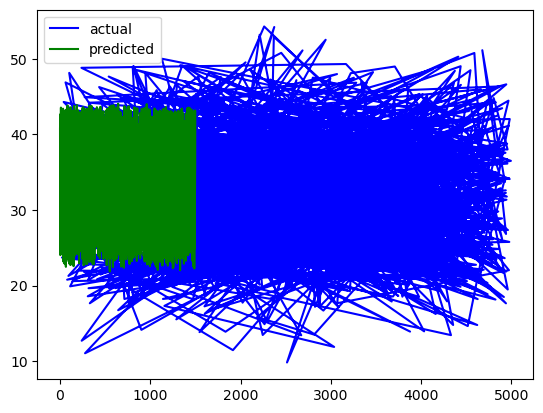

In [85]:
plt.plot(y_test_ann, label='actual', color='b')
plt.plot(y_pred_ann_2, label='predicted', color='g')
plt.legend()
plt.show()

### Test 8 - model ANN date scalate
#### engagement_level, accuracy_of_responses, progress_category_label

In [86]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [87]:
scaler = StandardScaler()

In [88]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=62)

In [89]:
X_train_ann_scaled2 = scaler.fit_transform(X_train_ann)
X_test_ann_scaled2 = scaler.transform(X_test_ann)

In [90]:
model_ann3 = Sequential([
    Dense(16, activation = 'relu', input_dim = X_train_ann_scaled2.shape[1]), # input_shape = X_train_ann.shape[1]
    Dense(16, activation = 'relu', input_dim = X_train_ann_scaled2.shape[1]),
    Dense(1)
])

model_ann3.compile(optimizer=Adam(0.02), loss='mean_squared_error')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
history = model_ann3.fit(X_train_ann_scaled2, y_train_ann, epochs=15, batch_size=16)

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 265.7958  
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 10.7844
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1923  
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 10.9341
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 10.8795
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 10.4338
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 10.3855
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 11.1638
Epoch 9/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 11.3102
Epoch 10/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4040  
Epoch 11/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.8608
Epoch 12/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 11.6510
Epoch 13/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 10.3413
Epoch 14/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 10.7120
Epoch 15/15
219/

In [92]:
y_pred_ann_3 = model_ann3.predict(X_test_ann_scaled2)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [93]:
MAE = mean_absolute_error(y_test, y_pred_ann_3)
MSE = mean_squared_error(y_test, y_pred_ann_3)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.532796154569355
MSE: 10.36815283529697
RMSE: 3.219961620159


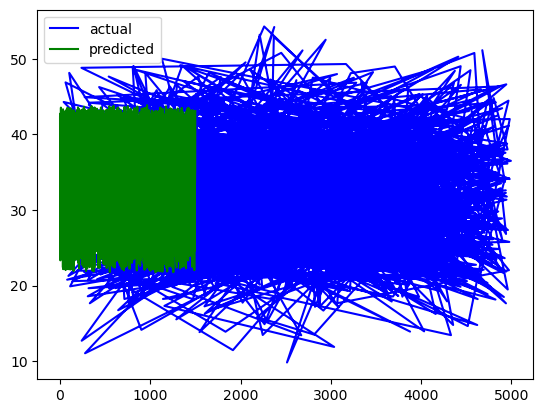

In [94]:
plt.plot(y_test_ann, label='actual', color='b')
plt.plot(y_pred_ann_3, label='predicted', color='g')
plt.legend()
plt.show()

### Test 9 - model ANN date scalate cu Early Stopping
#### engagement_level, accuracy_of_responses, progress_category_label

In [159]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [160]:
scaler = StandardScaler()

In [161]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=62)

In [179]:
X_train_ann_scaled3 = scaler.fit_transform(X_train_ann)
X_test_ann_scaled3 = scaler.transform(X_test_ann)

In [180]:
model_ann4 = Sequential([
    Dense(16, activation = 'relu', input_dim = X_train_ann_scaled2.shape[1]), # input_shape = X_train_ann.shape[1]
    Dense(16, activation = 'relu', input_dim = X_train_ann_scaled2.shape[1]),
    Dense(1)
])

model_ann4.compile(optimizer=Adam(0.02), loss='mean_squared_error')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [181]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True, mode='min', min_delta=1e-4)

In [182]:
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True
)

In [183]:
history = model_ann4.fit(X_train_ann_scaled3, y_train_ann, epochs=100, batch_size=16, callbacks=[checkpoint])

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 333.6584  
Epoch 2/100
168/219 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 10.8122

C:\Users\User\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 10.7747
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 11.2022
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 11.3323
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 11.6120
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 11.0644
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.8442  
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 10.9553
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 10.9661
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 11.0472
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 10.9381
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.7541
Epoch 13/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.8783
Epoch 14/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 11.7075
Epoch 15/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 10.4935
Epoch 16/100
219

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 10.3352
Epoch 80/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 9.9417
Epoch 81/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 9.8262
Epoch 82/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9694
Epoch 83/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6770  
Epoch 84/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2089  
Epoch 85/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.3214  
Epoch 86/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4507  
Epoch 87/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 9.7103
Epoch 88/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2140
Epoch 89/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1152  
Epoch 90/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9650  
Epoch 91/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2627  
Epoch 92/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4836
Epoch 93/100
219/

In [185]:
model_ann4.load_weights("best_model.keras")

FileNotFoundError: [Errno 2] No such file or directory: 'best_model.keras'

In [118]:
y_pred_ann_4 = best_model.predict(X_test_ann_scaled3)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


In [119]:
MAE = mean_absolute_error(y_test, y_pred_ann_4)
MSE = mean_squared_error(y_test, y_pred_ann_4)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 2.485846979600577
MSE: 10.043076419127893
RMSE: 3.1690813210026487
